/tmp/ipython-input-2525813808.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-2525813808.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Summary Statistics:
       PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.361582    0.523008    0.381594   32.204208
std     257.353842    0.486592   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    0.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200

Survival by Gender (%):
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Survival by Class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Survival by Embarked (%):
Embarked
C    55.357143
Q    38.961

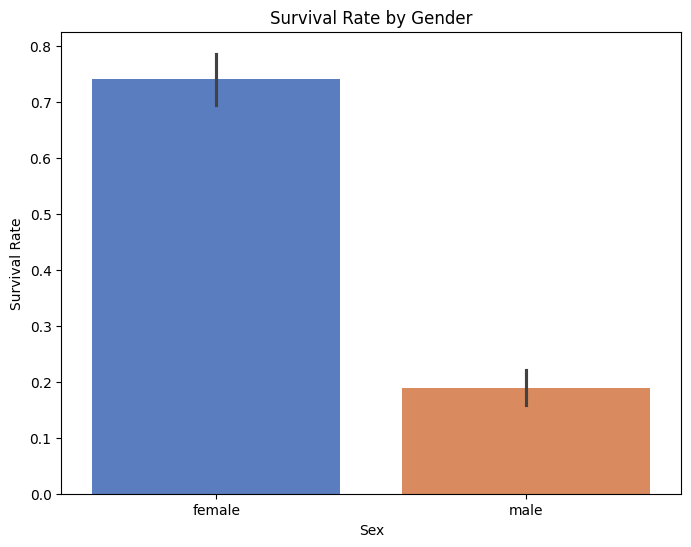

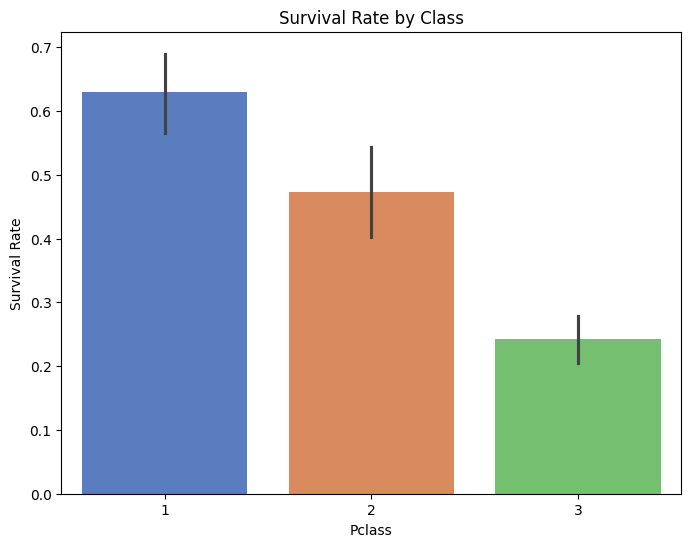

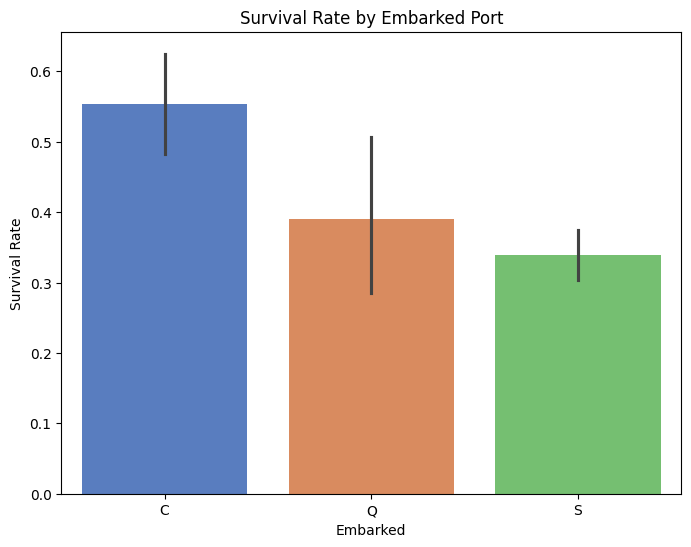

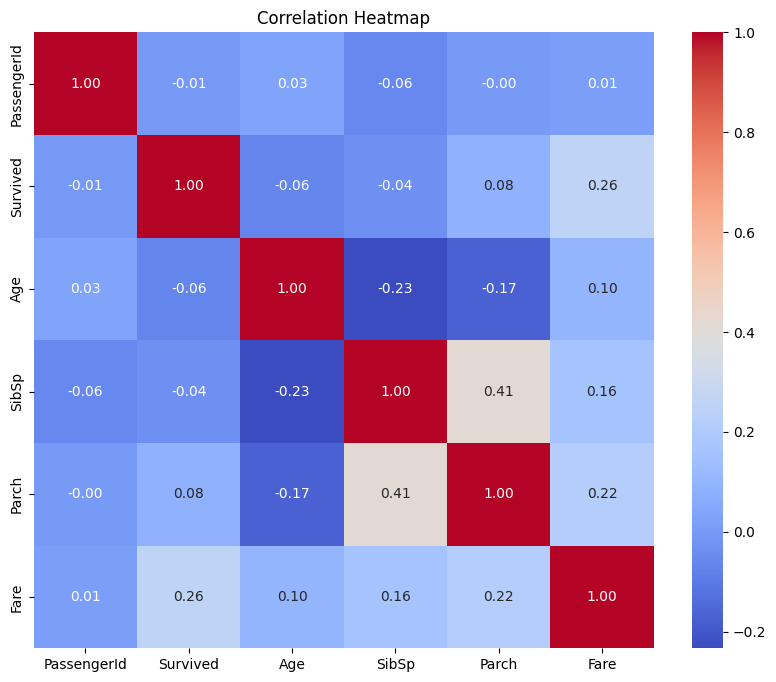

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv('train (1).csv')

# Data Cleaning
# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)  # Drop Cabin due to high missing values

# Convert types
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')
train_df['Pclass'] = train_df['Pclass'].astype('category')

# Create numeric mapping for Sex for correlations
train_df['Sex_num'] = train_df['Sex'].map({'male': 0, 'female': 1})

# Summary Statistics
print("Summary Statistics:")
print(train_df.describe())

# Group-Based Insights
# Survival by Gender
survival_by_gender = train_df.groupby('Sex')['Survived'].mean() * 100
print("\nSurvival by Gender (%):")
print(survival_by_gender)

# Survival by Class
survival_by_class = train_df.groupby('Pclass')['Survived'].mean() * 100
print("\nSurvival by Class (%):")
print(survival_by_class)

# Survival by Embarked
survival_by_embarked = train_df.groupby('Embarked')['Survived'].mean() * 100
print("\nSurvival by Embarked (%):")
print(survival_by_embarked)

# Correlations
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualizations
# Bar Plot: Survival by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', hue='Sex', data=train_df, palette='muted', legend=False)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Bar Plot: Survival by Class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=train_df, palette='muted', legend=False)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.show()

# Bar Plot: Survival by Embarked
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', hue='Embarked', data=train_df, palette='muted', legend=False)
plt.title('Survival Rate by Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()